In [1]:
import os
from os.path import join as pjoin
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import copy

# Graph Subsampling

### - graph log function

In [2]:
def graph_log(log, adj):
    print(log)
    print(adj)
    G = nx.Graph(adj)
    nx.draw_networkx(G)
    plt.axis('off')
    plt.show()

### - Graph subsampling random node removal function

In [3]:
def graph_subsampling_random_node_removal(adj, rate, log=True):
    if log: graph_log('--input graph--', adj)

    # get number of the node
    node_count = len(adj)
    
    # choose removed node
    remove_node_list = random.sample(range(0, node_count), int(node_count * rate))
    remove_node_list.sort()
    
    if log: print('remove node list:', remove_node_list)
    
    # process 1: remove a node and connected edge
    subsampling_graph_adj = copy.deepcopy(adj)
    
    subsampling_graph_adj = np.delete(subsampling_graph_adj, remove_node_list, axis=1)
    subsampling_graph_adj = np.delete(subsampling_graph_adj, remove_node_list, axis=0)
    
    if log: graph_log('--subsampling graph--', subsampling_graph_adj)
        
    # process 2: remove a node without a connected edge
    subsampling_graph_node_count = len(subsampling_graph_adj)
    node_without_connected_edge_list = []

    for i in range(subsampling_graph_node_count):
        if sum(subsampling_graph_adj[i]) == subsampling_graph_adj[i][i]:
            node_without_connected_edge_list.append(i)
                
    subsampling_graph_adj = np.delete(subsampling_graph_adj, node_without_connected_edge_list, axis=1)
    subsampling_graph_adj = np.delete(subsampling_graph_adj, node_without_connected_edge_list, axis=0)
    
    if log: graph_log('--subsampling graph--', subsampling_graph_adj)
        
    return subsampling_graph_adj

### - Graph subsampling random edge removal

In [4]:
def graph_subsampling_random_edge_removal(adj, rate, log=True):
    if log: graph_log('--input graph--', adj)
        
    # get number of the edge except for self roop
    node_count = len(adj)
    edge_count = 0
    for i in range(node_count):
        for a in range(node_count):
            if (i < a) and (adj[i][a] > 0):
                edge_count += 1
                    
    # choose removed edge
    remove_edge_list = random.sample(range(0, edge_count), int(edge_count * rate))
    remove_edge_list.sort()
    
    if log: print('remove edge list:', remove_edge_list)
    
    # remove edge
    subsampling_graph_adj = copy.deepcopy(adj)
    count = 0
    
    for i in range(node_count):
        for a in range(node_count):
            if (i < a) and (subsampling_graph_adj[i][a] > 0):   
                if count in remove_edge_list:
                    subsampling_graph_adj[i][a] = 0
                    subsampling_graph_adj[a][i] = 0
                count +=1
                
    if log: graph_log('--subsampling graph--', subsampling_graph_adj)
        
    # remove a node without a connected edge
    subsampling_graph_node_count = len(subsampling_graph_adj)
    node_without_connected_edge_list = []

    for i in range(subsampling_graph_node_count):
        if sum(subsampling_graph_adj[i]) == subsampling_graph_adj[i][i]:
            node_without_connected_edge_list.append(i)
                
    subsampling_graph_adj = np.delete(subsampling_graph_adj, node_without_connected_edge_list, axis=1)
    subsampling_graph_adj = np.delete(subsampling_graph_adj, node_without_connected_edge_list, axis=0)
    
    if log: graph_log('--subsampling graph--', subsampling_graph_adj)
        
    return subsampling_graph_adj

In [5]:
graph = np.array(
    [[0., 1., 1., 0., 1., 0.], 
     [1., 0., 1., 0., 0., 1.],
     [1., 1., 0., 1., 1., 0.],
     [0., 0., 1., 0., 1., 0.],
     [1., 0., 1., 1., 0., 1.],
    [0., 1., 0., 0., 1., 0.]])

### - Graph node subsampling example

--input graph--
[[0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [1. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0.]]


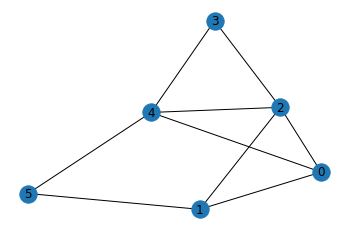

remove node list: [0, 1, 4]
--subsampling graph--
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]


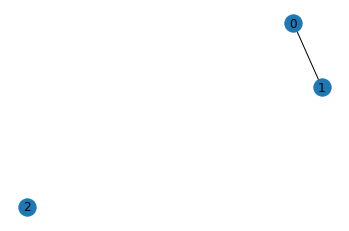

--subsampling graph--
[[0. 1.]
 [1. 0.]]


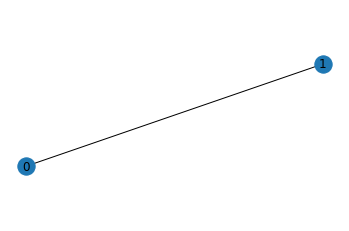

array([[0., 1.],
       [1., 0.]])

In [6]:
graph_subsampling_random_node_removal(graph, 0.5, log=True)

### - Graph edge subsampling example

--input graph--
[[0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [1. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0.]]


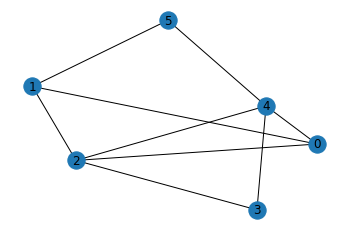

remove edge list: [1, 4, 6, 7]
--subsampling graph--
[[0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]


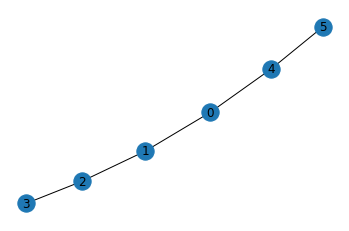

--subsampling graph--
[[0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]


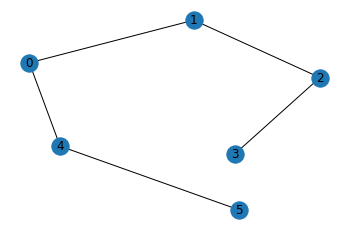

array([[0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]])

In [7]:
graph_subsampling_random_edge_removal(graph, 0.5, log=True)

## Load Graph Classification Dataset

In [8]:
class DataReader():
    '''
    Class to read the txt files containing all data of the dataset
    '''
    def __init__(self,
                 data_dir,  # folder with txt files
                 rnd_state=None,
                 use_cont_node_attr=False,  # use or not additional float valued node attributes available in some datasets
                 folds=10):

        self.data_dir = data_dir
        self.rnd_state = np.random.RandomState() if rnd_state is None else rnd_state
        self.use_cont_node_attr = use_cont_node_attr
        files = os.listdir(self.data_dir)
        
        print('path:', self.data_dir)
        
        data = {}
        nodes, graphs = self.read_graph_nodes_relations(list(filter(lambda f: f.find('graph_indicator') >= 0, files))[0]) 
        data['adj_list'] = self.read_graph_adj(list(filter(lambda f: f.find('_A') >= 0, files))[0], nodes, graphs)
        print('complete adj_list')
        
        # Read features or make features
        if len(list(filter(lambda f: f.find('node_labels') >= 0, files))) != 0:
            print('node label: node label in dataset')
            data['features'] = self.read_node_features(list(filter(lambda f: f.find('node_labels') >= 0, files))[0], 
                                                     nodes, graphs, fn=lambda s: int(s.strip()))
        else:
            print('node label: degree of nodes')
            data['features'] = self.get_node_features_degree(data['adj_list'])      
        print('complete features')
        
        data['targets'] = np.array(self.parse_txt_file(list(filter(lambda f: f.find('graph_labels') >= 0, files))[0],
                                                       line_parse_fn=lambda s: int(float(s.strip()))))
        print('complete targets')
               
        if self.use_cont_node_attr:
            data['attr'] = self.read_node_features(list(filter(lambda f: f.find('node_attributes') >= 0, files))[0], 
                                                   nodes, graphs, fn=lambda s: np.array(list(map(float, s.strip().split(',')))))
        
        features, n_edges, degrees = [], [], []
        for sample_id, adj in enumerate(data['adj_list']):
            N = len(adj)  # number of nodes
            if data['features'] is not None:
                assert N == len(data['features'][sample_id]), (N, len(data['features'][sample_id]))
            n = np.sum(adj)  # total sum of edges
#             assert n % 2 == 0, n
            n_edges.append( int(n / 2) )  # undirected edges, so need to divide by 2
            if not np.allclose(adj, adj.T):
                print(sample_id, 'not symmetric')
            degrees.extend(list(np.sum(adj, 1)))
            features.append(np.array(data['features'][sample_id]))
                        
        # Create features over graphs as one-hot vectors for each node
        features_all = np.concatenate(features)
        features_min = features_all.min()
        features_dim = int(features_all.max() - features_min + 1)  # number of possible values
        
        features_onehot = []
        for i, x in enumerate(features):
            feature_onehot = np.zeros((len(x), features_dim))
            for node, value in enumerate(x):
                feature_onehot[node, value - features_min] = 1
            if self.use_cont_node_attr:
                feature_onehot = np.concatenate((feature_onehot, np.array(data['attr'][i])), axis=1)
            features_onehot.append(feature_onehot)

        if self.use_cont_node_attr:
            features_dim = features_onehot[0].shape[1]
            
        shapes = [len(adj) for adj in data['adj_list']]
        labels = data['targets']        # graph class labels
        labels -= np.min(labels)        # to start from 0
        N_nodes_max = np.max(shapes)    

        classes = np.unique(labels)
        n_classes = len(classes)

        if not np.all(np.diff(classes) == 1):
            print('making labels sequential, otherwise pytorch might crash')
            labels_new = np.zeros(labels.shape, dtype=labels.dtype) - 1
            for lbl in range(n_classes):
                labels_new[labels == classes[lbl]] = lbl
            labels = labels_new
            classes = np.unique(labels)
            assert len(np.unique(labels)) == n_classes, np.unique(labels)
        
        print('The number of graphs:', len(data['adj_list']))
        print('N nodes avg/std/min/max: \t%.2f/%.2f/%d/%d' % (np.mean(shapes), np.std(shapes), np.min(shapes), np.max(shapes)))
        print('N edges avg/std/min/max: \t%.2f/%.2f/%d/%d' % (np.mean(n_edges), np.std(n_edges), np.min(n_edges), np.max(n_edges)))
        print('Node degree avg/std/min/max: \t%.2f/%.2f/%d/%d' % (np.mean(degrees), np.std(degrees), np.min(degrees), np.max(degrees)))
        print('Node features dim: \t\t%d' % features_dim)
        print('N classes: \t\t\t%d' % n_classes)
        print('Classes: \t\t\t%s' % str(classes))
        for lbl in classes:
            print('Class %d: \t\t\t%d samples' % (lbl, np.sum(labels == lbl)))

        for u in np.unique(features_all):
            print('feature {}, count {}/{}'.format(u, np.count_nonzero(features_all == u), len(features_all)))
        
        N_graphs = len(labels)  # number of samples (graphs) in data
        assert N_graphs == len(data['adj_list']) == len(features_onehot), 'invalid data'

        # Create test sets first
        train_ids, test_ids = self.split_ids(np.arange(N_graphs), rnd_state=self.rnd_state, folds=folds)

        # Create train sets
        splits = []
        for fold in range(folds):
            splits.append({'train': train_ids[fold],
                           'test': test_ids[fold]})

        data['features_onehot'] = features_onehot
        data['targets'] = labels
        data['splits'] = splits 
        data['N_nodes_max'] = np.max(shapes)  # max number of nodes
        data['features_dim'] = features_dim
        data['n_classes'] = n_classes
        
        self.data = data

    def split_ids(self, ids_all, rnd_state=None, folds=10):
        n = len(ids_all)
        ids = ids_all[rnd_state.permutation(n)]
        stride = int(np.ceil(n / float(folds)))
        test_ids = [ids[i: i + stride] for i in range(0, n, stride)]
        assert np.all(np.unique(np.concatenate(test_ids)) == sorted(ids_all)), 'some graphs are missing in the test sets'
        assert len(test_ids) == folds, 'invalid test sets'
        train_ids = []
        for fold in range(folds):
            train_ids.append(np.array([e for e in ids if e not in test_ids[fold]]))
            assert len(train_ids[fold]) + len(test_ids[fold]) == len(np.unique(list(train_ids[fold]) + list(test_ids[fold]))) == n, 'invalid splits'

        return train_ids, test_ids

    def parse_txt_file(self, fpath, line_parse_fn=None):
        with open(pjoin(self.data_dir, fpath), 'r') as f:
            lines = f.readlines()
        data = [line_parse_fn(s) if line_parse_fn is not None else s for s in lines]
        
        return data
    
    def read_graph_adj(self, fpath, nodes, graphs):
        edges = self.parse_txt_file(fpath, line_parse_fn=lambda s: s.split(','))
        adj_dict = {}
        for edge in edges:
            node1 = int(edge[0].strip()) - 1  # -1 because of zero-indexing in our code
            node2 = int(edge[1].strip()) - 1
            graph_id = nodes[node1]
            assert graph_id == nodes[node2], ('invalid data', graph_id, nodes[node2])
            if graph_id not in adj_dict:
                n = len(graphs[graph_id])
                adj_dict[graph_id] = np.zeros((n, n))
            ind1 = np.where(graphs[graph_id] == node1)[0]
            ind2 = np.where(graphs[graph_id] == node2)[0]
            assert len(ind1) == len(ind2) == 1, (ind1, ind2)
            adj_dict[graph_id][ind1, ind2] = 1
            
        adj_list = [adj_dict[graph_id] for graph_id in sorted(list(graphs.keys()))]
        
        return adj_list
        
    def read_graph_nodes_relations(self, fpath):
        graph_ids = self.parse_txt_file(fpath, line_parse_fn=lambda s: int(s.rstrip()))
        nodes, graphs = {}, {}
        for node_id, graph_id in enumerate(graph_ids):
            if graph_id not in graphs:
                graphs[graph_id] = []
            graphs[graph_id].append(node_id)
            nodes[node_id] = graph_id
        graph_ids = np.unique(list(graphs.keys()))
        for graph_id in graphs:
            graphs[graph_id] = np.array(graphs[graph_id])
        return nodes, graphs

    def read_node_features(self, fpath, nodes, graphs, fn):
        node_features_all = self.parse_txt_file(fpath, line_parse_fn=fn)
        node_features = {}
        
        for node_id, x in enumerate(node_features_all):
            graph_id = nodes[node_id]
            if graph_id not in node_features:
                node_features[graph_id] = [ None ] * len(graphs[graph_id])
            ind = np.where(graphs[graph_id] == node_id)[0]
            assert len(ind) == 1, ind
            assert node_features[graph_id][ind[0]] is None, node_features[graph_id][ind[0]]
            node_features[graph_id][ind[0]] = x
        node_features_lst = [node_features[graph_id] for graph_id in sorted(list(graphs.keys()))]
        return node_features_lst
    
    def get_node_features_degree(self, adj_list):
        node_features_list = []

        for adj in adj_list:
            sub_list = []
            for feature in nx.from_numpy_matrix(np.array(adj)).degree():
                sub_list.append(feature[1])
            node_features_list.append(sub_list)

        return node_features_list

In [9]:
dataset = 'IMDB-BINARY'
n_folds = 10
seed = 111

In [10]:
datareader = DataReader(data_dir='./data/%s/' % dataset.upper(),
                        rnd_state=np.random.RandomState(seed),
                        folds=n_folds,                    
                        use_cont_node_attr=False)

path: ./data/IMDB-BINARY/
complete adj_list
node label: degree of nodes
complete features
complete targets
The number of graphs: 1000
N nodes avg/std/min/max: 	19.77/10.06/12/136
N edges avg/std/min/max: 	96.53/105.60/26/1249
Node degree avg/std/min/max: 	9.76/7.43/1/135
Node features dim: 		135
N classes: 			2
Classes: 			[0 1]
Class 0: 			500 samples
Class 1: 			500 samples
feature 1, count 1/19773
feature 2, count 30/19773
feature 3, count 790/19773
feature 4, count 2144/19773
feature 5, count 3275/19773
feature 6, count 2730/19773
feature 7, count 2444/19773
feature 8, count 1118/19773
feature 9, count 861/19773
feature 10, count 554/19773
feature 11, count 1140/19773
feature 12, count 427/19773
feature 13, count 258/19773
feature 14, count 546/19773
feature 15, count 76/19773
feature 16, count 317/19773
feature 17, count 581/19773
feature 18, count 107/19773
feature 19, count 385/19773
feature 20, count 61/19773
feature 21, count 51/19773
feature 22, count 26/19773
feature 23, cou

### - Graph classification dataset example

In [11]:
datareader.data['adj_list'][0]

array([[0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
        1., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 1.

In [12]:
datareader.data['features_onehot'][0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
datareader.data['targets'][0]

0

## Graph Classification Dataset Subsampling

In [14]:
def graph_dataset_subsampling(adj_list, node_features_list, label_list, rate, repeat_count, node_removal=True, log=True):
    subsampling_adj_list = []
    subsampling_node_features_list = []
    subsampling_label_list = []
    
    for i in range(len(adj_list)):
        for a in range(repeat_count):
            if node_removal:
                subsampling_adj_list.append(graph_subsampling_random_node_removal(adj_list[i], rate, log))
            else:
                subsampling_adj_list.append(graph_subsampling_random_edge_removal(adj_list[i], rate, log))
            
            subsampling_node_features_list.append(node_features_list[i])
            subsampling_label_list.append(label_list[i])

    return np.array(subsampling_adj_list), np.array(subsampling_node_features_list), np.array(subsampling_label_list)

### - Graph classification dataset node subsampling example

In [15]:
rate = 0.5
repeat_count = 3

--input graph--
[[0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

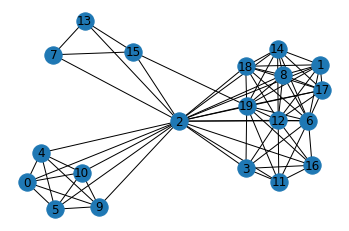

remove node list: [1, 6, 7, 9, 10, 11, 14, 15, 16, 17]
--subsampling graph--
[[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 1. 0. 1. 0.]]


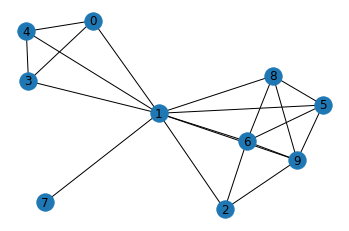

--subsampling graph--
[[0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 1. 0. 1. 0.]]


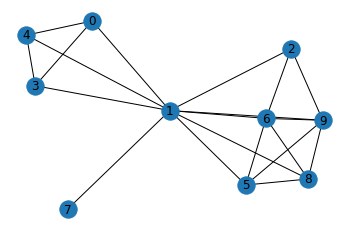

--input graph--
[[0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

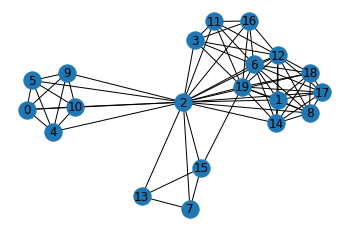

remove node list: [0, 1, 4, 7, 10, 12, 13, 14, 15, 18]
--subsampling graph--
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 0.]]


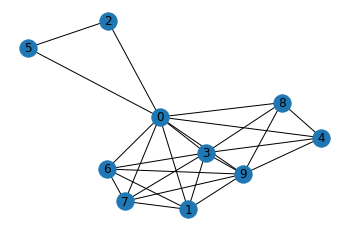

--subsampling graph--
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 0.]]


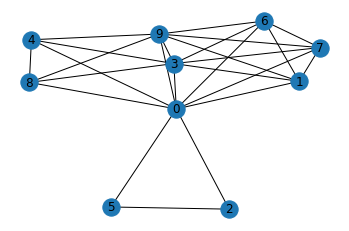

--input graph--
[[0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

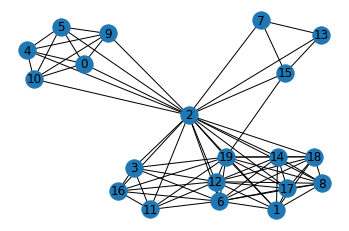

remove node list: [0, 1, 8, 10, 11, 14, 15, 16, 18, 19]
--subsampling graph--
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]]


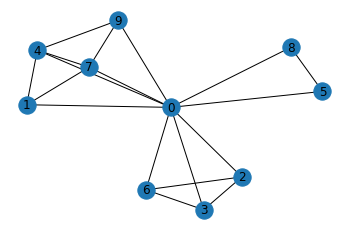

--subsampling graph--
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]]


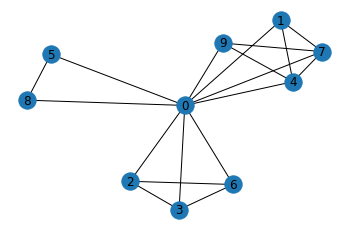

In [16]:
node_subsampling_adj_list, node_subsampling_node_features_list, node_subsampling_label_list = graph_dataset_subsampling(datareader.data['adj_list'][:1],
                                                                                                         datareader.data['features_onehot'][:1],
                                                                                                         datareader.data['targets'][:1],
                                                                                                         rate=rate,
                                                                                                         repeat_count=repeat_count,
                                                                                                         node_removal=True)

In [17]:
len(node_subsampling_adj_list), len(node_subsampling_node_features_list), len(node_subsampling_label_list)

(3, 3, 3)

In [18]:
node_subsampling_adj_list[0]

array([[0., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 1., 1., 0., 0., 1., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1., 1., 0., 1., 0.]])

In [19]:
node_subsampling_node_features_list[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
node_subsampling_label_list[0]

0

### - Graph classification dataset edge subsampling example

--input graph--
[[0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

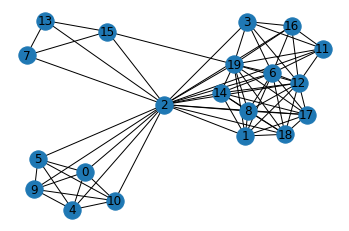

remove edge list: [2, 6, 10, 12, 13, 15, 16, 17, 21, 23, 25, 26, 27, 29, 30, 31, 35, 36, 39, 40, 41, 42, 44, 46, 47, 50, 55, 56, 57, 59, 60, 61, 64, 65, 66, 72]
--subsampling graph--
[[0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.

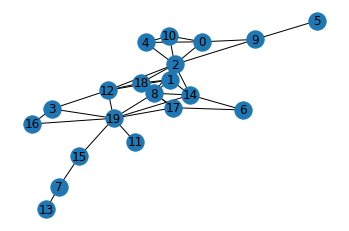

--subsampling graph--
[[0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0

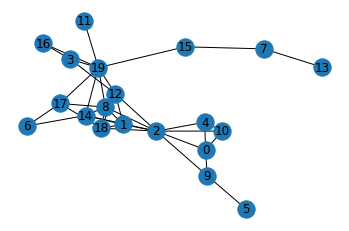

--input graph--
[[0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

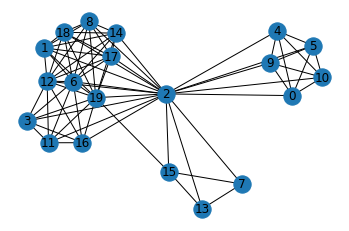

remove edge list: [0, 2, 3, 5, 6, 7, 8, 9, 10, 13, 17, 18, 28, 31, 32, 33, 34, 35, 38, 41, 42, 43, 47, 48, 49, 53, 55, 58, 62, 64, 65, 67, 68, 70, 71, 72]
--subsampling graph--
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
 [0.

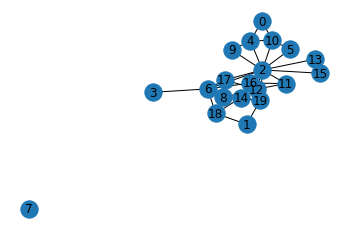

--subsampling graph--
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0

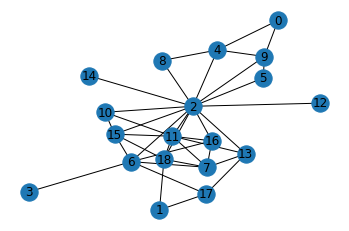

--input graph--
[[0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

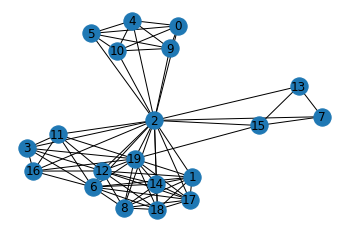

remove edge list: [0, 1, 3, 4, 5, 6, 12, 13, 15, 19, 20, 21, 22, 23, 25, 26, 27, 29, 31, 37, 39, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 57, 67, 69, 70]
--subsampling graph--
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
 [

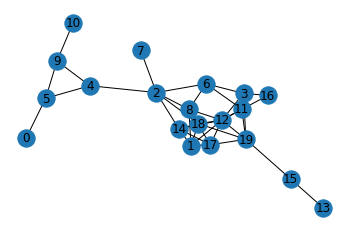

--subsampling graph--
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

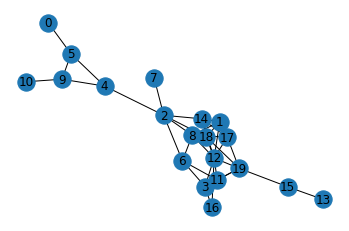

In [21]:
edge_subsampling_adj_list, edge_subsampling_node_features_list, edge_subsampling_label_list = graph_dataset_subsampling(datareader.data['adj_list'][:1],
                                                                                                         datareader.data['features_onehot'][:1],
                                                                                                         datareader.data['targets'][:1],
                                                                                                         rate=rate,
                                                                                                         repeat_count=repeat_count,
                                                                                                         node_removal=False)

In [22]:
len(edge_subsampling_adj_list), len(edge_subsampling_node_features_list), len(edge_subsampling_label_list)

(3, 3, 3)

In [23]:
edge_subsampling_adj_list[0]

array([[0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 1.],
       [1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.

In [24]:
edge_subsampling_node_features_list[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
edge_subsampling_label_list[0]

0